In [1]:
# import
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
import pandas as pd
from scipy.spatial import distance
from sklearn import manifold
from sklearn import decomposition
from sklearn import preprocessing
import csv

C:\Users\pslav\AppData\Local\Temp\ipykernel_1164\2490119919.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
mtor = []

with open('data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    for m in reader:
        mtor.append(Chem.MolFromSmiles(m['Smiles']))

In [3]:
suppl = Chem.SDMolSupplier('data/drugbank.sdf')
drugbank = [m for m in suppl if m]

[11:37:16] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[11:37:16] Warning: ambiguous stereochemistry - opposing bonds have opposite wedging - at atom 28 ignored.
[11:37:17] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[11:37:17] ERROR: Could not sanitize molecule ending on line 250947
[11:37:17] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[11:37:17] Explicit valence for atom # 17 O, 3, is greater than permitted
[11:37:17] ERROR: Could not sanitize molecule ending on line 258130
[11:37:17] ERROR: Explicit valence for atom # 17 O, 3, is greater than permitted
[11:37:17] Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[11:37:17] ERROR: Could not sanitize molecule ending on line 261581
[11:37:17] ERROR: Can't kekulize mol.  Unkekulized atoms: 57 58 59 60 61 62 63 64 65
[11:37:17] Can't kekulize mol.  Unkekulized atoms: 0 1 2 6 7 8 9 10 11 12 13 14 15 16 17
[11:37:17] ERROR: Could not 

In [4]:
# get organic drugbank
has_C = Chem.MolFromSmarts("[#6]")
org_drugbank = [drug for drug in drugbank if drug.HasSubstructMatch(has_C)]

In [5]:
mtor = pd.DataFrame([{'mol': m, 'smiles': Chem.MolToSmiles(m), 'source': 'mtor'}for m in mtor], columns=['mol', 'smiles', 'source'])
drugbank = pd.DataFrame([{'mol': m, 'smiles': Chem.MolToSmiles(m), 'source': 'drugbank'}for m in org_drugbank], columns=['mol', 'smiles', 'source'])

In [6]:
mtor

,mol,smiles,source
0,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,mtor
1,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,mtor
2,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,mtor
3,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,mtor
4,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,mtor
...,...,...,...
4591,<rdkit.Chem.rdchem.Mol object at 0x0000023959A...,COc1ncc(-c2ccc3nccc(=O)n3c2)cc1NS(=O)(=O)c1ccc...,mtor
4592,<rdkit.Chem.rdchem.Mol object at 0x0000023959A...,O=c1ccnc2ccc(-c3cnc(Cl)c(NS(=O)(=O)c4ccc(F)cc4...,mtor
4593,<rdkit.Chem.rdchem.Mol object at 0x0000023959A...,C=CC(=O)Nc1ccc(-n2c(=O)ccc3oc4ccc(-c5cccnc5)cc...,mtor
4594,<rdkit.Chem.rdchem.Mol object at 0x0000023959A...,COc1ccc(-c2ccc3c(N4CCOCC4)nc(CN)nc3n2)cc1CO,mtor


In [7]:
df = pd.concat([mtor, drugbank], ignore_index=True)

In [8]:
df

,mol,smiles,source
0,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,mtor
1,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,mtor
2,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,mtor
3,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,mtor
4,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,mtor
...,...,...,...
11632,<rdkit.Chem.rdchem.Mol object at 0x00000239629...,Oc1ccc(Cl)cc1,drugbank
11633,<rdkit.Chem.rdchem.Mol object at 0x00000239629...,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,drugbank
11634,<rdkit.Chem.rdchem.Mol object at 0x00000239629...,CC(=O)Nc1ccc(C(=O)O)cc1.CC(=O)Nc1ccc(C(=O)O)cc...,drugbank
11635,<rdkit.Chem.rdchem.Mol object at 0x00000239629...,CCCCCCCCCCCCOC(=O)CS(=O)(=O)[O-].[Na+],drugbank


In [9]:
df = df.join(pd.DataFrame((rdMolDescriptors.MQNs_(mol) for mol in df['mol']), columns=[*(f"MQN_{x}" for x in range(1,43))]))

In [10]:
df

,mol,smiles,source,MQN_1,MQN_2,MQN_3,MQN_4,MQN_5,MQN_6,MQN_7,...,MQN_33,MQN_34,MQN_35,MQN_36,MQN_37,MQN_38,MQN_39,MQN_40,MQN_41,MQN_42
0,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccccc4F)n3...,mtor,19,1,0,0,0,2,0,...,0,0,1,3,0,0,0,0,2,1
1,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(OCc4cccc(C)c4)n3)cc2s1,mtor,21,0,0,0,0,1,0,...,0,0,1,3,0,0,0,0,2,1
2,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,COc1cccc(COc2nccc(-c3ccc4nc(NC(C)=O)sc4c3)n2)c1,mtor,21,0,0,0,0,1,0,...,0,0,1,3,0,0,0,0,2,1
3,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(NS(=O)(=O)c4ccc(F)cc4)...,mtor,19,1,0,0,0,2,0,...,0,0,1,3,0,0,0,0,2,1
4,<rdkit.Chem.rdchem.Mol object at 0x00000239599...,CC(=O)Nc1nc2ccc(-c3ccnc(N(C)S(=O)(=O)c4ccccc4F...,mtor,20,1,0,0,0,2,0,...,0,0,1,3,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11632,<rdkit.Chem.rdchem.Mol object at 0x00000239629...,Oc1ccc(Cl)cc1,drugbank,6,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11633,<rdkit.Chem.rdchem.Mol object at 0x00000239629...,O=c1ccc2cc(O[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)...,drugbank,15,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,2,1
11634,<rdkit.Chem.rdchem.Mol object at 0x00000239629...,CC(=O)Nc1ccc(C(=O)O)cc1.CC(=O)Nc1ccc(C(=O)O)cc...,drugbank,52,0,0,0,0,0,0,...,0,0,2,4,0,0,0,0,2,1
11635,<rdkit.Chem.rdchem.Mol object at 0x00000239629...,CCCCCCCCCCCCOC(=O)CS(=O)(=O)[O-].[Na+],drugbank,14,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
norm = preprocessing.normalize(df[(f"MQN_{x}" for x in range(1, 43))])

In [12]:
norm

array([[0.41461399, 0.02182179, 0.        , ..., 0.        , 0.04364358,
        0.02182179],
       [0.47665761, 0.        , 0.        , ..., 0.        , 0.04539596,
        0.02269798],
       [0.45968261, 0.        , 0.        , ..., 0.        , 0.0437793 ,
        0.02188965],
       ...,
       [0.4107753 , 0.        , 0.        , ..., 0.        , 0.01579905,
        0.00789953],
       [0.36880436, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.49046576, 0.0222939 , 0.0222939 , ..., 0.        , 0.13376339,
        0.06688169]])

In [13]:
df_norm = pd.DataFrame(norm)

In [14]:
df_norm.describe()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
count,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,...,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000,11637.000000
mean,0.423232,0.006442,0.003473,0.000802,0.000414,0.006571,0.002139,0.027913,0.056237,0.070957,...,0.000662,0.000435,0.015329,0.054116,0.000832,0.000032,0.000004,0.000240,0.035471,0.019486
std,0.081071,0.020339,0.013565,0.008317,0.005301,0.015687,0.009217,0.029320,0.047254,0.061013,...,0.005045,0.003328,0.018937,0.027052,0.004187,0.000876,0.000206,0.002356,0.044525,0.031147
min,0.035377,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.398946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024070,...,0.000000,0.000000,0.000000,0.037905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.439843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024077,0.057705,0.052432,...,0.000000,0.000000,0.000000,0.059602,0.000000,0.000000,0.000000,0.000000,0.030986,0.015491
75%,0.475010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042080,0.090443,0.103835,...,0.000000,0.000000,0.025857,0.073743,0.000000,0.000000,0.000000,0.000000,0.054718,0.027661
max,0.707107,0.417597,0.316228,0.447214,0.122474,0.210819,0.130189,0.359211,0.258678,0.310434,...,0.245959,0.108465,0.132745,0.158114,0.051164,0.043769,0.012640,0.100279,0.395285,0.474342


In [15]:
pca = decomposition.PCA()
pca.fit(df_norm)

PCA()

In [16]:
df_pca = pd.DataFrame(pca.transform(df_norm))

In [17]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.081197,-0.019219,-0.093770,0.026105,0.008009,-0.043498,0.042180,0.005566,-0.022924,0.017026,...,-0.000832,-0.000127,-0.000189,0.000179,0.000154,-0.000077,-0.000040,0.000012,3.249920e-07,-0.000003
1,-0.148518,0.063787,-0.077440,0.005740,-0.006475,-0.035674,0.050617,-0.011499,0.003073,-0.004339,...,-0.000712,0.000292,0.000301,0.000264,0.000206,-0.000011,-0.000016,0.000050,-4.906601e-06,-0.000006
2,-0.102665,0.049266,-0.081310,-0.023030,-0.008909,-0.049770,0.052387,-0.020559,0.000593,-0.008260,...,-0.000636,0.000394,0.000324,0.000370,0.000340,-0.000011,-0.000018,0.000025,-1.097403e-05,-0.000009
3,-0.081197,-0.019219,-0.093770,0.026105,0.008009,-0.043498,0.042180,0.005566,-0.022924,0.017026,...,-0.000832,-0.000127,-0.000189,0.000179,0.000154,-0.000077,-0.000040,0.000012,3.249920e-07,-0.000003
4,-0.076692,-0.002571,-0.080912,0.047690,0.019032,-0.068727,0.034269,0.026463,-0.034028,-0.000895,...,-0.000937,-0.000019,-0.000010,0.000433,0.000137,-0.000053,-0.000020,-0.000011,-1.119606e-06,-0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11632,-0.151422,0.026474,-0.054137,0.161887,0.074178,0.008328,0.015374,-0.032034,0.107270,0.009355,...,0.002177,-0.000892,-0.000020,-0.000047,0.000060,0.000049,0.000043,0.000129,1.279033e-05,0.000004
11633,0.110007,-0.221189,0.050783,0.007551,-0.040326,-0.024567,0.013366,-0.105959,0.054901,-0.009666,...,0.000454,0.000595,0.000436,-0.000413,0.000600,-0.000140,-0.000022,0.000030,-2.620554e-05,0.000011
11634,0.219147,-0.029532,-0.023696,0.083809,0.029304,-0.021189,-0.016007,-0.015802,-0.043547,-0.022197,...,0.001809,-0.000319,-0.000299,0.000185,0.000056,0.000074,0.000126,0.000002,2.500568e-06,0.000002
11635,0.463822,0.291888,0.039702,-0.188255,-0.036839,-0.077450,0.070453,0.042654,0.040132,0.053210,...,-0.000618,0.001597,-0.000983,-0.001300,-0.004086,-0.000047,-0.000053,-0.000371,-1.994202e-05,0.000003


In [18]:
source = df['source'].tolist()

In [19]:
df_pca['source'] = source

In [20]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,source
0,-0.081197,-0.019219,-0.093770,0.026105,0.008009,-0.043498,0.042180,0.005566,-0.022924,0.017026,...,-0.000127,-0.000189,0.000179,0.000154,-0.000077,-0.000040,0.000012,3.249920e-07,-0.000003,mtor
1,-0.148518,0.063787,-0.077440,0.005740,-0.006475,-0.035674,0.050617,-0.011499,0.003073,-0.004339,...,0.000292,0.000301,0.000264,0.000206,-0.000011,-0.000016,0.000050,-4.906601e-06,-0.000006,mtor
2,-0.102665,0.049266,-0.081310,-0.023030,-0.008909,-0.049770,0.052387,-0.020559,0.000593,-0.008260,...,0.000394,0.000324,0.000370,0.000340,-0.000011,-0.000018,0.000025,-1.097403e-05,-0.000009,mtor
3,-0.081197,-0.019219,-0.093770,0.026105,0.008009,-0.043498,0.042180,0.005566,-0.022924,0.017026,...,-0.000127,-0.000189,0.000179,0.000154,-0.000077,-0.000040,0.000012,3.249920e-07,-0.000003,mtor
4,-0.076692,-0.002571,-0.080912,0.047690,0.019032,-0.068727,0.034269,0.026463,-0.034028,-0.000895,...,-0.000019,-0.000010,0.000433,0.000137,-0.000053,-0.000020,-0.000011,-1.119606e-06,-0.000002,mtor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11632,-0.151422,0.026474,-0.054137,0.161887,0.074178,0.008328,0.015374,-0.032034,0.107270,0.009355,...,-0.000892,-0.000020,-0.000047,0.000060,0.000049,0.000043,0.000129,1.279033e-05,0.000004,drugbank
11633,0.110007,-0.221189,0.050783,0.007551,-0.040326,-0.024567,0.013366,-0.105959,0.054901,-0.009666,...,0.000595,0.000436,-0.000413,0.000600,-0.000140,-0.000022,0.000030,-2.620554e-05,0.000011,drugbank
11634,0.219147,-0.029532,-0.023696,0.083809,0.029304,-0.021189,-0.016007,-0.015802,-0.043547,-0.022197,...,-0.000319,-0.000299,0.000185,0.000056,0.000074,0.000126,0.000002,2.500568e-06,0.000002,drugbank
11635,0.463822,0.291888,0.039702,-0.188255,-0.036839,-0.077450,0.070453,0.042654,0.040132,0.053210,...,0.001597,-0.000983,-0.001300,-0.004086,-0.000047,-0.000053,-0.000371,-1.994202e-05,0.000003,drugbank


In [21]:
import seaborn

<Axes: xlabel='0', ylabel='1'>

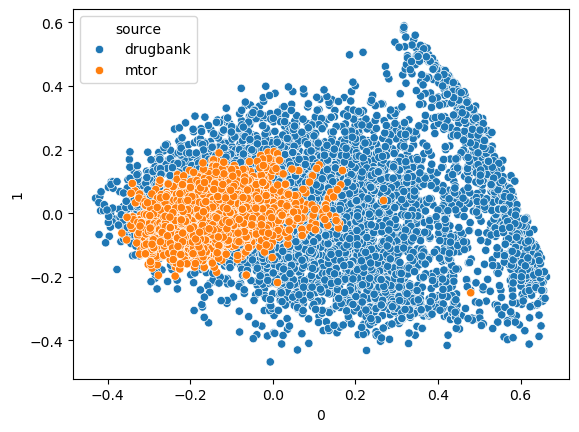

In [22]:
seaborn.scatterplot(x=0, y=1, data=df_pca.sort_values('source'), hue="source")

In [23]:
# add fingerprint bit vectors to df
df['fps'] = df.apply(lambda row: Chem.GetMorganFingerprintAsBitVect(row['mol'], 2, nBits=1024), axis=1)

In [24]:
# # get distance matrix
# sparse_mat = distance.pdist(list(df['fps']), metric="jaccard")
# dist_mat = distance.squareform(sparse_mat)

In [25]:
import numpy as np

In [26]:
# np.save('distance_matrix.npy', dist_mat)

In [27]:
dist_mat = np.load('distance_matrix.npy')

In [28]:
dist_mat

array([[0.        , 0.47945205, 0.48648649, ..., 0.86111111, 0.89473684,
        0.86597938],
       [0.47945205, 0.        , 0.18032787, ..., 0.85981308, 0.90789474,
        0.87628866],
       [0.48648649, 0.18032787, 0.        , ..., 0.86111111, 0.90909091,
        0.87755102],
       ...,
       [0.86111111, 0.85981308, 0.86111111, ..., 0.        , 0.94444444,
        0.88990826],
       [0.89473684, 0.90789474, 0.90909091, ..., 0.94444444, 0.        ,
        0.89189189],
       [0.86597938, 0.87628866, 0.87755102, ..., 0.88990826, 0.89189189,
        0.        ]])

In [30]:
clf = manifold.TSNE(n_components=2, metric="precomputed", init="random")
X_tsne = clf.fit_transform(dist_mat)

In [32]:
from matplotlib import pyplot

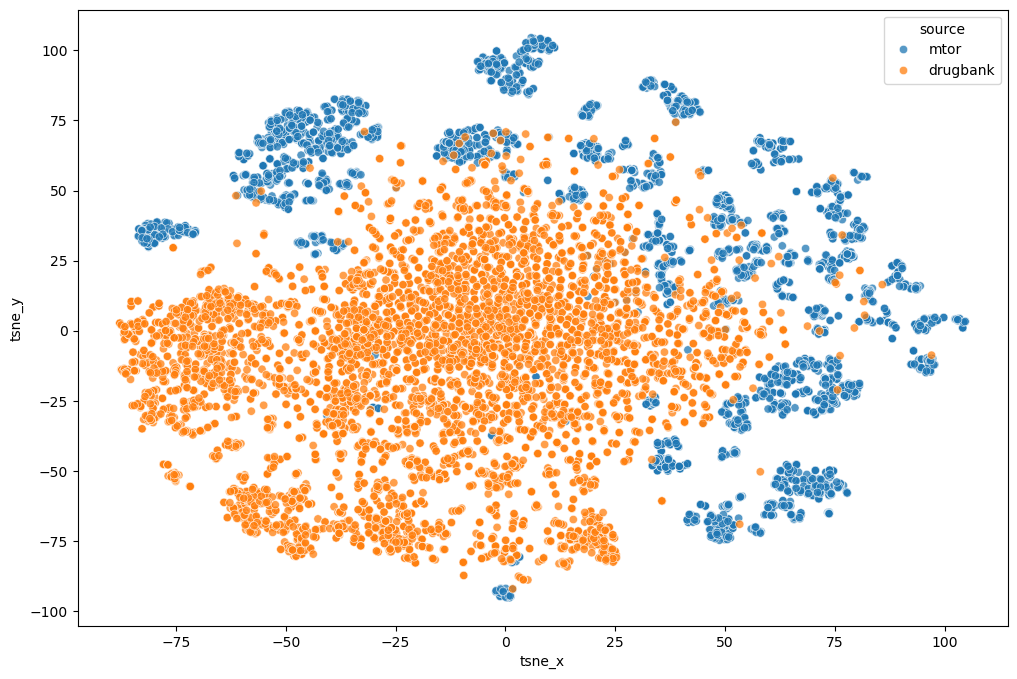

In [37]:
fig, ax = pyplot.subplots(figsize=(12,8))
p=seaborn.scatterplot(x="tsne_x",
                      y="tsne_y",
                      data=df.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"])),
                      hue="source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [34]:
import umap
reducer = umap.UMAP(metric="precomputed")
embedding = reducer.fit_transform(dist_mat)

c:\Users\pslav\miniconda3\envs\cdd\Lib\site-packages\umap\umap_.py:1857: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


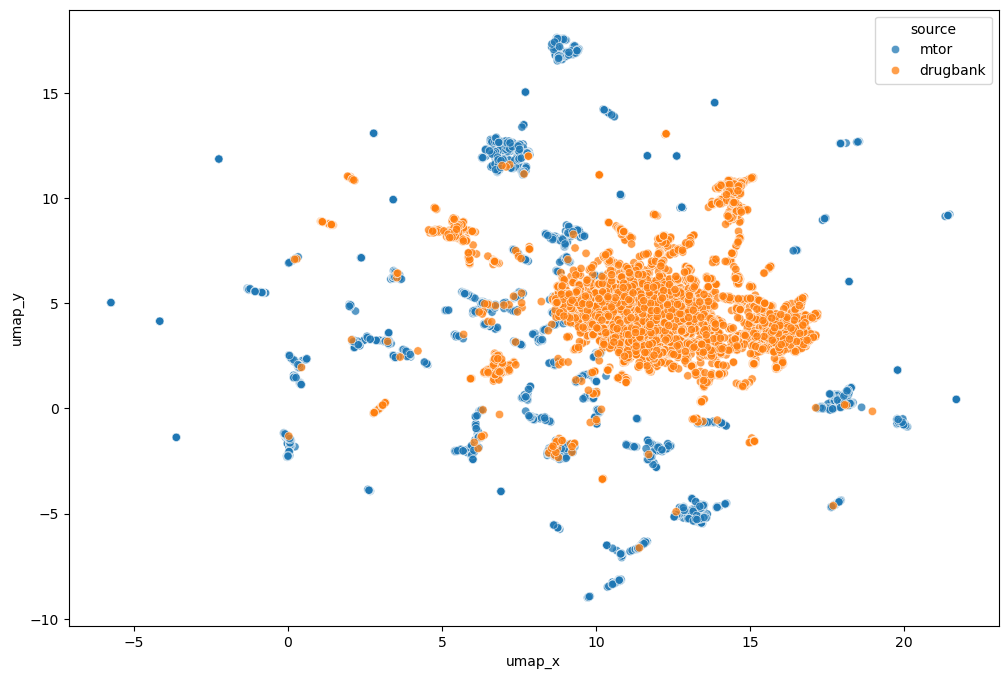

In [36]:
fig, ax = pyplot.subplots(figsize=(12,8))
p=seaborn.scatterplot(x="umap_x",
                      y="umap_y",
                      data=df.join(pd.DataFrame(embedding, columns=["umap_x", "umap_y"])),
                      hue="source",
                      legend="brief",
                      ax=ax,
                      alpha=0.75
                     )

In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

In [77]:
c = AgglomerativeClustering(linkage='complete', metric='precomputed', n_clusters=10, compute_full_tree=True)
c.fit(dist_mat)

AgglomerativeClustering(compute_full_tree=True, linkage='complete',
                        metric='precomputed', n_clusters=10)

In [78]:
len(c.labels_)

11637

In [50]:
sum(c.labels_) / len(c.labels_)

2.276961416172553

In [46]:
c.children_

array([[    8,   472],
       [    9,  1902],
       [   10,   128],
       ...,
       [23255, 23269],
       [23244, 23270],
       [23252, 23271]])

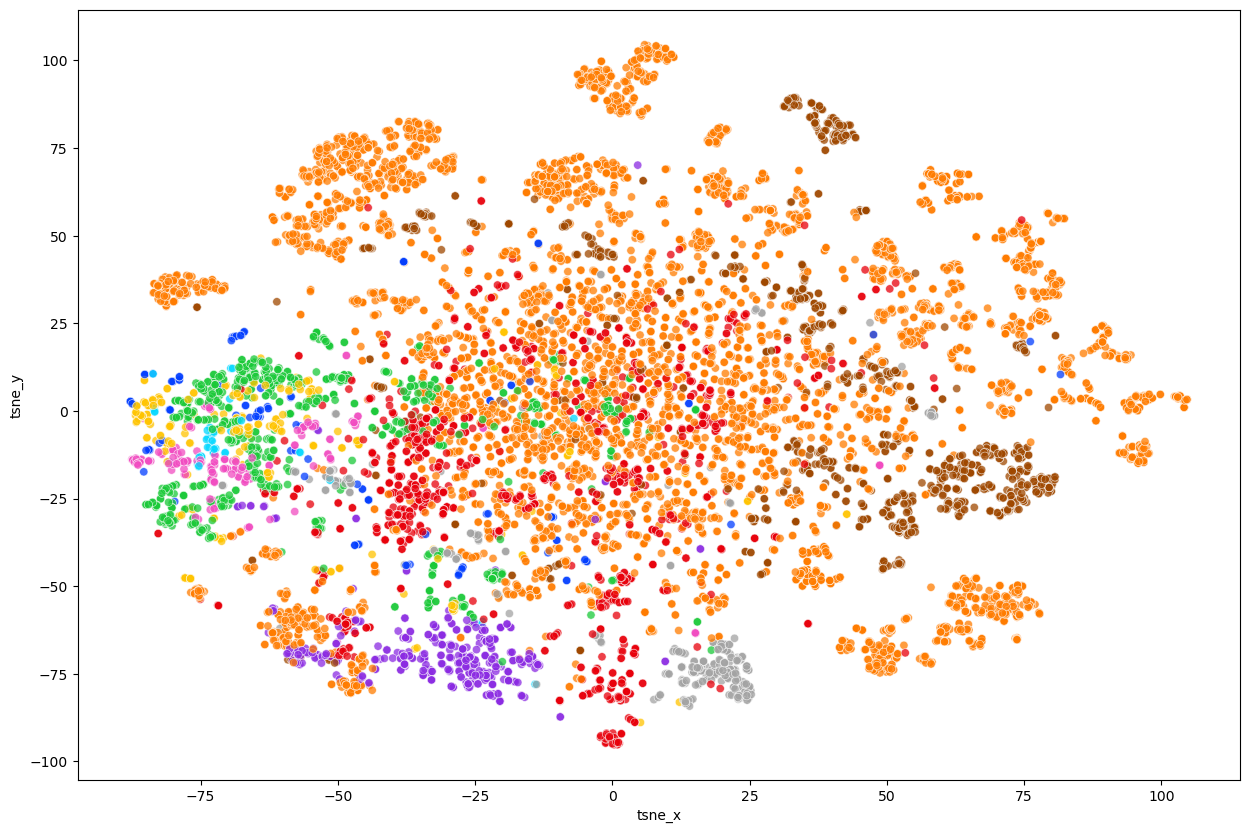

In [81]:
fig, ax = pyplot.subplots(figsize=(15,10))
p=seaborn.scatterplot(x= "tsne_x",
                    y="tsne_y",
                    data=df.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"])),
                    hue=c.labels_,
                    ax=ax,
                    alpha=0.75,
                    legend=False,
                    palette = 'bright'
                    )

In [68]:
k = KMeans()
k.fit(X_tsne)

KMeans()

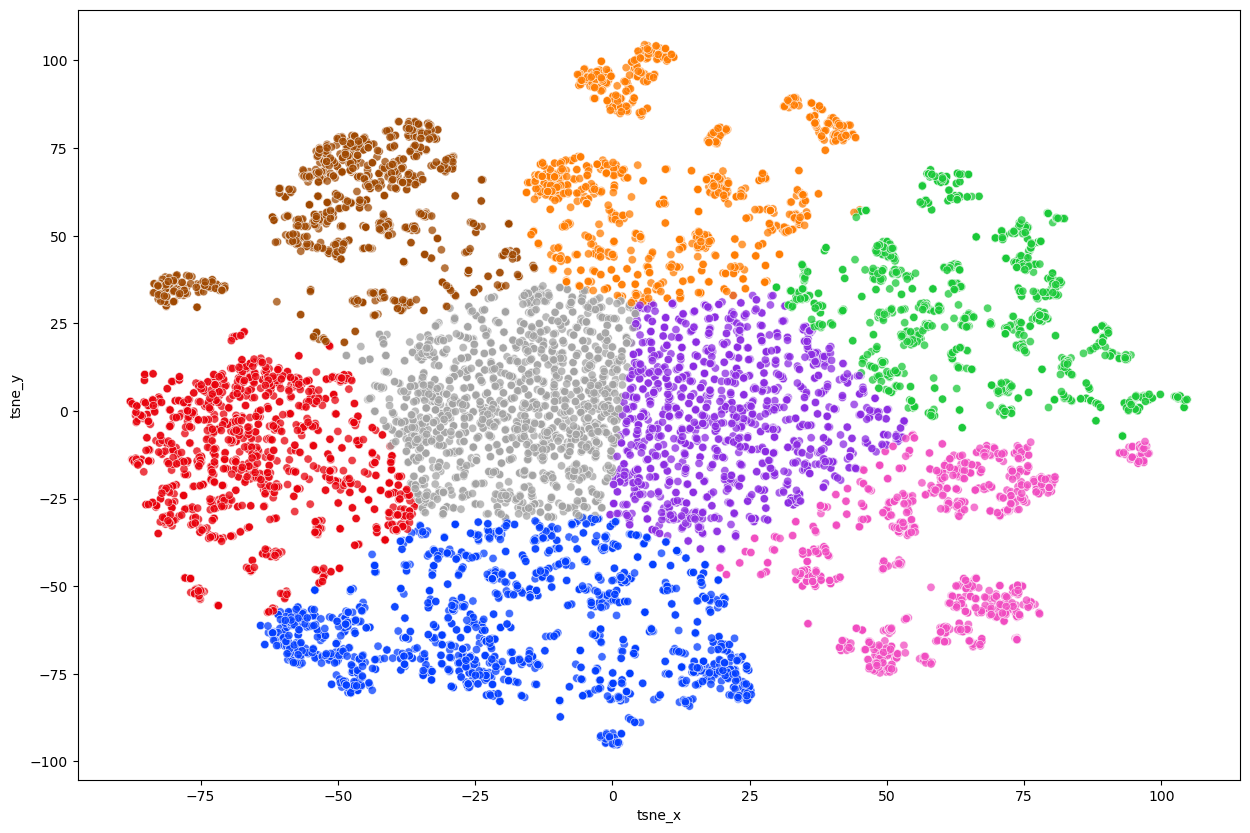

In [82]:
fig, ax = pyplot.subplots(figsize=(15,10))
p=seaborn.scatterplot(x= "tsne_x",
                    y="tsne_y",
                    data=df.join(pd.DataFrame(X_tsne, columns=["tsne_x", "tsne_y"])),
                    hue=k.labels_,
                    ax=ax,
                    alpha=0.75,
                    legend=False,
                    palette = 'bright'
                    )